# K-means Report of Algorithm and Implementation

In [1]:
import numpy as np 
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", 
        style = 'white' ,font_scale = 1.5, color_codes=True)

In [2]:
%run kmeans

## What is clustering?
Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. 

Clustering can be used to deal with unsupervised learning, that seeks to find the devision and lable a group of points

For example, there is a mall having thousands of customers, and the owner wants to analyze the customer behavior to improve revenue. Individually touching each person is not efficient. Instead, a better way is to group similar customers and come up with a general solution for each segment.

In this notebook, I will use mall customer data, to provide an intuiative visualization of K-means clustering. Also, I will use color compression to show the powerness of clustering. 

## K-means clustering
K-means is a centroid-based algorithm, or a distance-based algorithm, where we group data into k number of clusters. In K-Means, each cluster is associated with a centroid.

K-means algorithm:
1. Select k unique points from input dataset as initial centroids.
2. For each data point, assign closest centroid. There are many ways to find the distance. Euclidean distance is used in this notebook.
3. Calculate the mean point for each seperated region, and treat them as new centroids.
4. Repete the iteration until clusters don't change, or the change is so small and below the threshhold.

## Let's visualize K-means with mall customers data

In [3]:
customers_df = pd.read_csv('data/Mall_Customers.csv', index_col='CustomerID')
X = customers_df.iloc[:, [2, 3]].values

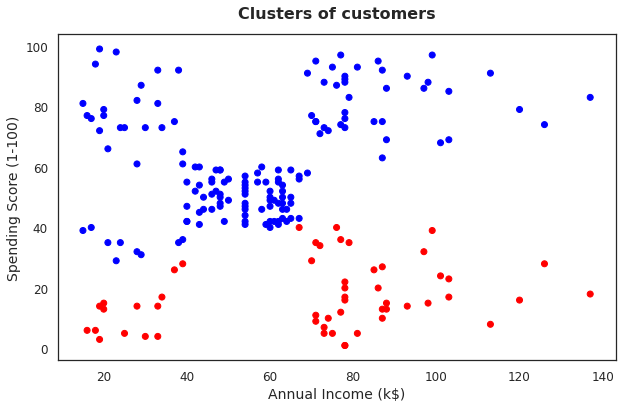

In [4]:
centroids, labels = kmeans(X, k=2)

colors = np.array(['red','blue'])
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.title('Clusters of customers', size=16, 
          weight='bold', y=1.03)
plt.xlabel('Annual Income (k$)', size=14)
plt.ylabel('Spending Score (1-100)', size=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In this initial application, only two groups are assigned. It is clear that more segmentations are needed. So finding the optimal k should be our first goal 

## Elbow method
The Elbow method is a very popular technique and the idea is to run k-means clustering for a range of clusters k (let’s say from 1 to 10) and for each value, we are calculating the euclidean distance between each point and its assigned centroid.

When the distortions are plotted and the plot looks like an arm then the “elbow” (the point of inflection on the curve) is the best value of k. Generally, the distance will keep decreasing with increasing cluster number. But the computing time will increase. So the "elbow" is a good place to go that can balance accuracy and time.

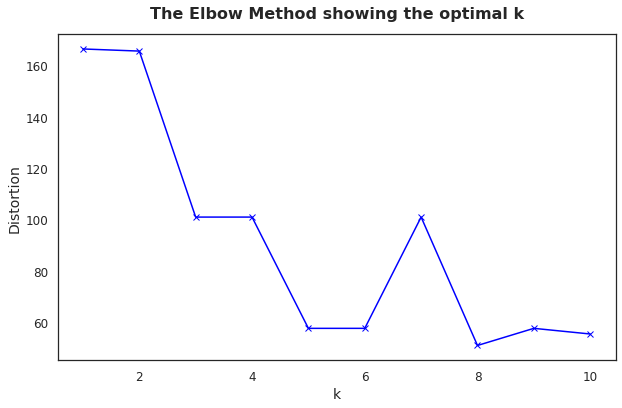

In [5]:
distance_list = []
K = range(1, 11)
for k in K:
    _, _, distance = kmeans(X, k=k, return_distance=True)
    distance_list.append(distance)
    
plt.figure(figsize=(10,6))
plt.plot(K, distance_list, 'bx-')
plt.xlabel('k', size=14)
plt.ylabel('Distortion', size=14)
plt.title('The Elbow Method showing the optimal k', size=16, 
          weight='bold', y=1.03)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

It appears that k=5 is the elbow point. So let's re-plot the mall customer data to visualize the pattern.

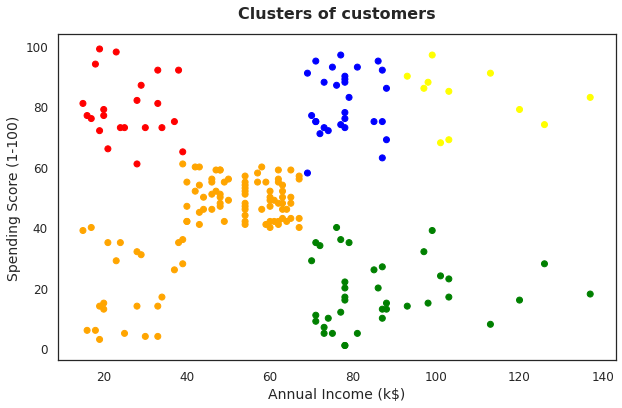

In [6]:
centroids, labels = kmeans(X, k=5)

colors = np.array(['red','blue','yellow', 'orange', 'green'])
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.title('Clusters of customers', size=16, 
          weight='bold', y=1.03)
plt.xlabel('Annual Income (k$)', size=14)
plt.ylabel('Spending Score (1-100)', size=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

+ In this plot, some points are still "false" classified. For example. the blue and yellow points should be in one group, and orange points should be seperated into two groups.
+ The reason of wrongly segmentation is randomly picking the inital centroids. To overcome this, we introduce "k-means++" method to pick the best initial centroid value.

## k-means++
One disadvantage of the K-means algorithm is that it is sensitive to the initialization of the centroids. So, if a centroid is initialized to be a “far-off” point, it might just end up with no points associated with it.

To overcome the above-mentioned drawback we use K-means++. This algorithm ensures our initial centorids are seperated with each other in the data space.

K-means++ algorithm:
1. Randomly select the first centroid.
2. For each data point compute its distance from the nearest, previously chosen centroid.
3. Select the next centroid from the data points such that the new centroid has the max distance to its previous assigned centroid.
4. Repeat steps 2 and 3 until k centroids have been sampled.

Re-plot again with k-means++.

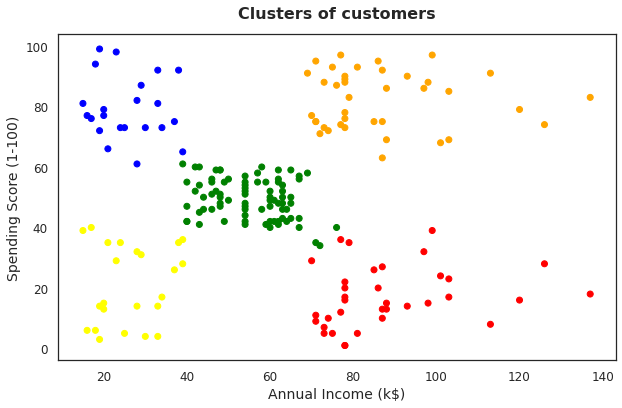

In [7]:
centroids, labels = kmeans(X, k=5, centroids='kmeans++')

colors = np.array(['red','blue','yellow', 'orange', 'green'])
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.title('Clusters of customers', size=16, 
          weight='bold', y=1.03)
plt.xlabel('Annual Income (k$)', size=14)
plt.ylabel('Spending Score (1-100)', size=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

Boom! A much better clustering is generated. Customers are segmented into five groups which are disjoined with each other. To improve the mall's profit, the management can consider providing different strategies to each group:
+ High-end customers (Orange): 
    - Provide extra services or products to keep these customers.
+ Potential customers (Red): 
    - These customers have the potential purchasing capability. So the management should improve the product awareness like advertising. 
    - The company can investigate preferences of these customers, and adjust products to fufill their needs.
+ Loyal customers (Blue):
    - Introduce incentive plants, such as membership card and discounts.

## Picture Compression

K-means can be used to compress pictures with smaller unique colors representing millions of colors.

Bing Dwen Dwen, a cute panda with a suit of ice, is the official mascot of the 2022 Beijing Winter Olympics. I am using its image to do a sample demonstration of picture compression with K-means algorithm.

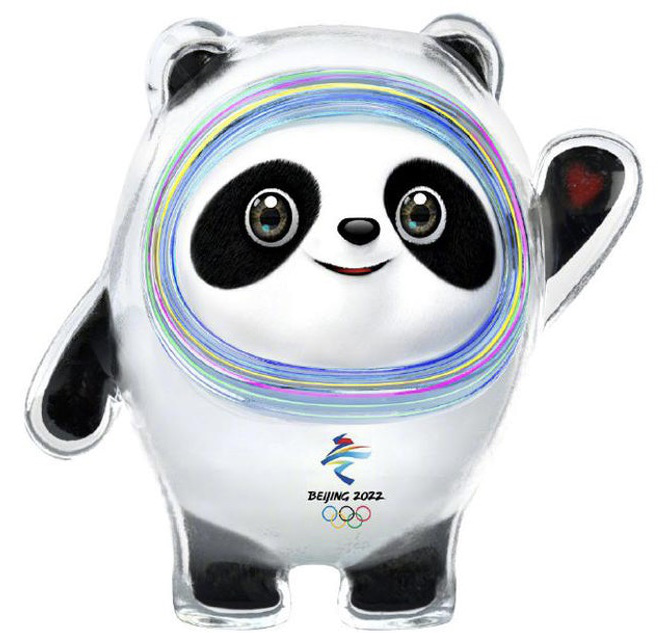

In [8]:
path = 'data/Bing-Dwen-Dwen.jpg'
Image.open(path)

img = Image.open(path)
img

To fit image data into K-means algorithm, we need to reshape it. Let's try two colors (k=2) first.

The image shape is (633, 658, 3)


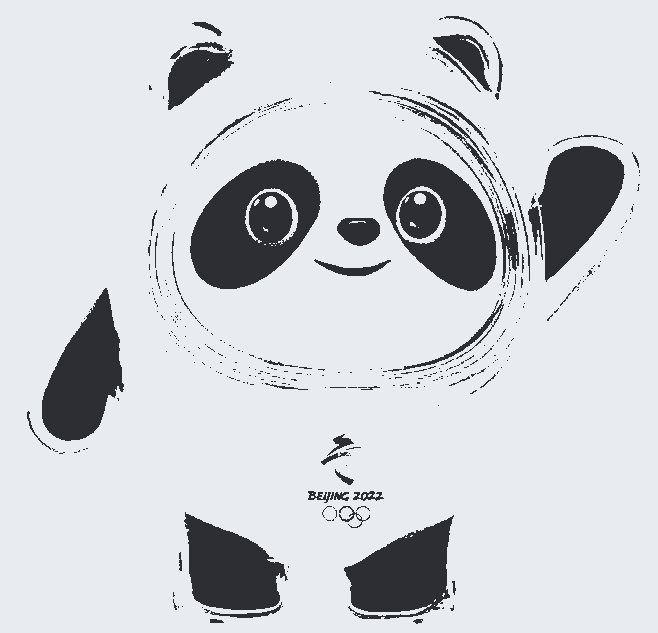

In [9]:
X = np.array(img)
h = X.shape[0]
w = X.shape[1]
print(f"The image shape is {X.shape}")

k = 2
centroids, labels = kmeans(X.reshape(-1, 3), k=k, 
                           centroids='kmeans++', tolerance=.01)
centroids = centroids.astype(np.uint8)
X = centroids[labels] # reassign all points

img_k2 = Image.fromarray(X.reshape(h,w, 3))
img_k2

Apparently only dark and grey are used to represent all colors. Let's check how many colors exist originaly.

In [10]:
import cv2
image=cv2.imread(path)# change here
b,g,r = cv2.split(image)
out_in_32U_2D =  np.int32(b) << 16 + np.int32(g) << 8 + np.int32(r)  #bit wise shift 8 for each channel. 
out_in_32U_1D= out_in_32U_2D.reshape(-1) #convert to 1D
np.unique(out_in_32U_1D)
len(np.unique(out_in_32U_1D))

25

There are 25 colors in the original image. Now I am compressing them to 15 colors.

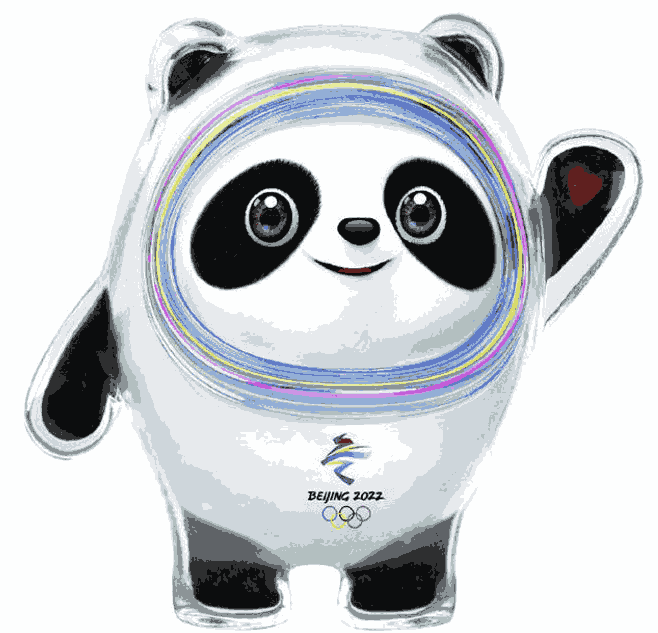

In [11]:
X = np.array(img)
h = X.shape[0]
w = X.shape[1]

k = 15
centroids, labels = kmeans(X.reshape(-1, 3), k=k, 
                           centroids='kmeans++', tolerance=.01)
centroids = centroids.astype(np.uint8)
X = centroids[labels] # reassign all points

img_k15 = Image.fromarray(X.reshape(h,w,3))
img_k15

Done! The new image with less colors shows comic style shading. Bing Dwen Dwen is saying hello!